<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/011_rnn_lstm_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.04.16 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with RNN & LSTM - Results**

### Contents

##### 1. Input Data
##### 5. Model Training
*  預先訓練多個模型並儲存
*  Training History

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  RNN
*  LSTM
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%
*  Feature Importance

##### 9. Best and Worst Model
*  各模型組合中，預測最好和最差的月份
*  RNN 和 LSTM 各自預測最好和最差的模型組合
*  所有模型組合中，預測最好和最差的模型組合


## **0. Setup**

In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.2 MB/s eta 0:00:00


In [ ]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/MyDrive/論文/code/Function


In [ ]:
from MonRevForecast import predictMonthlyRevenueNN, BestWorstModelNN, trainMonthlyRevenueNN

importing Jupyter notebook from MonRevForecast.ipynb


In [ ]:
from MonRevPlot import plotExpectedPredictedRevenues, plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [ ]:
from MonRevPlot import plotAllScores, compareModelScore, scoreBoxplotV

In [ ]:
from MonRevForecast import plotTrainingHistory

### **Project Path**

In [ ]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

【**月營收盈餘 (2015-2022)**】

資料期間：2015年1月至2022年12月（共96個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站


In [ ]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201501-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,8921719,4823318,7695107,8468346,7989971,8545853,8250361,7397417,7026214,8081068,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6851825,3279346,5274419,5767824,5623713,5516532,5746639,5512417,5546527,5901983,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,310280,160324,200719,273126,320563,143719,175596,184087,189109,321446,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,520536,335531,471332,447811,371720,411286,412816,376087,423675,461991,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,518826,341533,431529,432670,471084,441613,463001,329405,340734,396102,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,284990,251041,279617,333189,321941,300731,289975,300810,347401,333945,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,301850,131575,325762,152812,262623,193277,102874,172944,172431,177217,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,200493,217812,272212,194423,235272,271207,184345,272110,256634,282106,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [ ]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1308, 96)
Data size: 125568


## **5. Model Training**

### **5.2.3 預先訓練多個模型並儲存**


In [ ]:
test_y_1 = 2020 
test_y_2 = 2021
test_y_3 = 2022
start_m_1 = 1
end_m_1 = 6
start_m_2 = 7
end_m_2 = 12

#### **RNN**

In [ ]:
model_save_path_rnn = os.path.join(project_path, 'model/rnn')

2020 (4.5 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'rnn', model_save_path_rnn)

2020-01 model saved. Using time: 1525.826  secs.
2020-02 model saved. Using time: 1481.441  secs.
2020-03 model saved. Using time: 1533.320  secs.
2020-04 model saved. Using time: 1478.132  secs.
2020-05 model saved. Using time: 1521.546  secs.
2020-06 model saved. Using time: 1517.754  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_2, test_y_1, end_m_2, 'rnn', model_save_path_rnn)

2020-07 model saved. Using time: 1084.372  secs.
2020-08 model saved. Using time: 1165.826  secs.
2020-09 model saved. Using time: 1173.744  secs.
2020-10 model saved. Using time: 1196.036  secs.
2020-11 model saved. Using time: 1150.677  secs.
2020-12 model saved. Using time: 1139.116  secs.


2021 (4.5 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'rnn', model_save_path_rnn)

2021-01 model saved. Using time: 1167.886  secs.
2021-02 model saved. Using time: 1174.049  secs.
2021-03 model saved. Using time: 1163.153  secs.
2021-04 model saved. Using time: 1187.447  secs.
2021-05 model saved. Using time: 1138.425  secs.
2021-06 model saved. Using time: 1167.113  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_2, test_y_2, end_m_2, 'rnn', model_save_path_rnn)

2021-07 model saved. Using time: 1391.657  secs.
2021-08 model saved. Using time: 1539.479  secs.
2021-09 model saved. Using time: 1510.709  secs.
2021-10 model saved. Using time: 1583.580  secs.
2021-11 model saved. Using time: 1454.328  secs.
2021-12 model saved. Using time: 1550.950  secs.


2022 (5.3 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'rnn', model_save_path_rnn)

2022-01 model saved. Using time: 1499.955  secs.
2022-02 model saved. Using time: 1626.539  secs.
2022-03 model saved. Using time: 1572.605  secs.
2022-04 model saved. Using time: 1518.260  secs.
2022-05 model saved. Using time: 1629.265  secs.
2022-06 model saved. Using time: 1593.370  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_2, test_y_3, end_m_2, 'rnn', model_save_path_rnn)

2022-07 model saved. Using time: 1557.296  secs.
2022-08 model saved. Using time: 1510.510  secs.
2022-09 model saved. Using time: 1705.883  secs.
2022-10 model saved. Using time: 1638.052  secs.
2022-11 model saved. Using time: 1637.894  secs.
2022-12 model saved. Using time: 1695.061  secs.


#### **LSTM**

In [ ]:
model_save_path_lstm = os.path.join(project_path, 'model/lstm')

2020 (4.7 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'lstm', model_save_path_lstm)

2020-01 model saved. Using time: 1253.240  secs.
2020-02 model saved. Using time: 1321.776  secs.
2020-03 model saved. Using time: 1271.460  secs.
2020-04 model saved. Using time: 1261.777  secs.
2020-05 model saved. Using time: 1221.910  secs.
2020-06 model saved. Using time: 1254.512  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_2, test_y_1, end_m_2, 'lstm', model_save_path_lstm)

2020-07 model saved. Using time: 1512.184  secs.
2020-08 model saved. Using time: 1553.431  secs.
2020-09 model saved. Using time: 1521.204  secs.
2020-10 model saved. Using time: 1556.398  secs.
2020-11 model saved. Using time: 1536.173  secs.
2020-12 model saved. Using time: 1526.649  secs.


2021 (6.2 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'lstm', model_save_path_lstm)

2021-01 model saved. Using time: 1845.131  secs.
2021-02 model saved. Using time: 1889.553  secs.
2021-03 model saved. Using time: 2016.508  secs.
2021-04 model saved. Using time: 1979.190  secs.
2021-05 model saved. Using time: 1999.360  secs.
2021-06 model saved. Using time: 1858.805  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_2, test_y_2, end_m_2, 'lstm', model_save_path_lstm)

2021-07 model saved. Using time: 1760.997  secs.
2021-08 model saved. Using time: 1799.456  secs.
2021-09 model saved. Using time: 1881.973  secs.
2021-10 model saved. Using time: 1906.258  secs.
2021-11 model saved. Using time: 1769.272  secs.
2021-12 model saved. Using time: 1718.964  secs.


2022 (4.5 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'lstm', model_save_path_lstm)

2022-01 model saved. Using time: 1582.148  secs.
2022-02 model saved. Using time: 1671.698  secs.
2022-03 model saved. Using time: 1632.402  secs.
2022-04 model saved. Using time: 1523.040  secs.
2022-05 model saved. Using time: 1580.177  secs.
2022-06 model saved. Using time: 1581.861  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_2, test_y_3, end_m_2, 'lstm', model_save_path_lstm)

2022-07 model saved. Using time: 1135.211  secs.
2022-08 model saved. Using time: 1084.503  secs.
2022-09 model saved. Using time: 1160.457  secs.
2022-10 model saved. Using time: 1058.623  secs.
2022-11 model saved. Using time: 1135.107  secs.
2022-12 model saved. Using time: 1193.832  secs.


### **5.2.4 Training History**

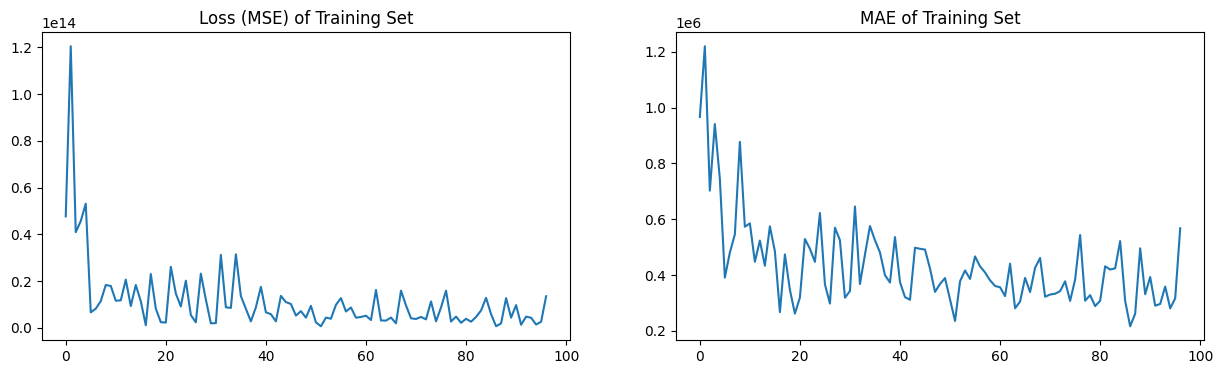

In [ ]:
# RNN
plotTrainingHistory(model_save_path_rnn, '2022-12', 'model')

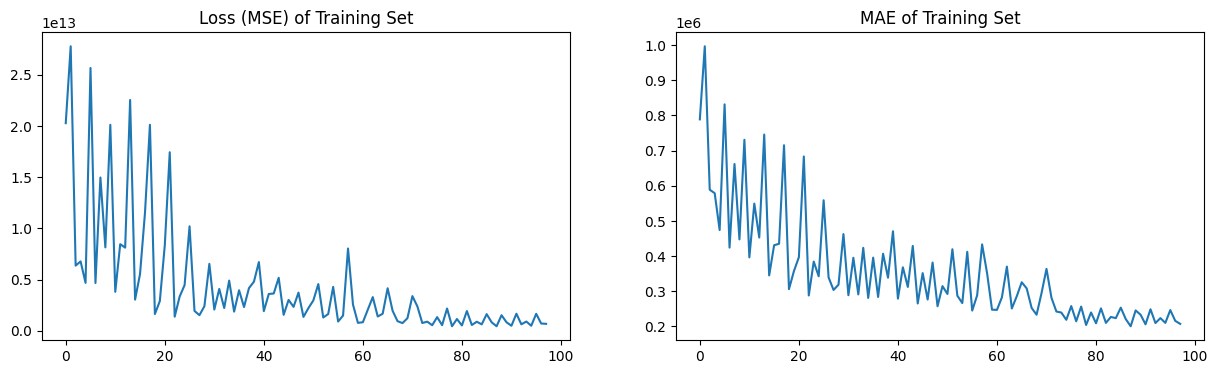

In [ ]:
# LSTM
plotTrainingHistory(model_save_path_lstm, '2022-12', 'model')

## **7. Predicting Results**


||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2015-01 - 2018-12|2019-01|2016-01 - 2019-12|**2020-01**|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|**2022-12**|

In [ ]:
# 預測年月
start_y = 2020
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [ ]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [ ]:
# Output
def outputPredictingResults(category: str, modelName: str, pred: dict):
    pred['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/org_pred_{modelName}_{category}.xlsx'))
    pred['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_pred_{modelName}_{category}.xlsx'))
    pred['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_pred_{modelName}_{category}.xlsx'))
    pred['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/def_pred_{modelName}_{category}.xlsx'))
    pred['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_def_pred_{modelName}_{category}.xlsx'))
    pred['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_def_pred_{modelName}_{category}.xlsx'))

def outputScores(category: str, modelName: str, scoresD: pd.DataFrame):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/scores_{modelName}_{category}.xlsx'))

### **7.2 RNN**

In [ ]:
# Load trained model
model_save_path_rnn = os.path.join(project_path, 'model/rnn')

In [ ]:
# RNN (5 min.)
pred_rnn, scores_rnn = predictMonthlyRevenueNN(org_data, start_y, start_m, end_y, end_m, 'rnn', model_save_path_rnn)

Using time: 252.824  secs.


In [ ]:
# Output
outputPredictingResults('2015', 'rnn', pred_rnn)
outputScores('2015', 'rnn', scores_rnn)

#### **7.2.1 Predicting Results**

In [ ]:
# Original
print(pred_rnn['org']['org'].shape)
print(pred_rnn['org']['dec'].shape)
print(pred_rnn['org']['season'].shape)
pred_rnn['org']['org'].head(4)

(1308, 36)
(1308, 36)
(1308, 36)


,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,16049627.0,8962537.0,9694714.0,9595269.0,9722095.0,10064725.0,9403934.0,9683441.0,9712848.0,8515710.0,...,10083680.0,8953242.0,8976976.0,8504232.0,6562562.0,9692850.0,10650546.0,9897758.0,11280704.0,11025685.0
1102 亞泥,11518015.0,6299991.0,6814038.0,6907768.0,6688598.0,6749732.0,6625679.0,6549686.0,6557523.0,5840217.0,...,8265584.0,8416926.0,7369152.0,7974100.0,6073790.0,8214164.0,8545993.0,7625932.0,9346619.0,8670475.0
1103 嘉泥,178345.0,182392.0,144909.0,162991.0,185935.0,168165.0,163352.0,159886.0,197306.0,152348.0,...,204448.0,194090.0,176836.0,195327.0,139767.0,184661.0,191762.0,189278.0,222833.0,208110.0
1104 環泥,571655.0,389979.0,384479.0,405584.0,427089.0,405481.0,405600.0,413793.0,426013.0,370708.0,...,583073.0,602333.0,529582.0,575543.0,457443.0,570965.0,618044.0,593243.0,687911.0,619127.0


In [ ]:
# Deflating
print(pred_rnn['def']['org'].shape)
print(pred_rnn['def']['dec'].shape)
print(pred_rnn['def']['season'].shape)
pred_rnn['def']['org'].head(4)

(1308, 36)
(1308, 36)
(1308, 36)


,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,11562384.0,6323989.0,10064002.0,9603540.0,9832737.0,10034442.0,10272959.0,10039224.0,10266874.0,9805263.0,...,8614912.0,9828405.0,7635630.0,8995884.0,9052108.0,9919565.0,10718314.0,11092359.0,12272287.0,11591016.0
1102 亞泥,7737663.0,3723906.0,6712608.0,6456860.0,6737555.0,6322784.0,7154757.0,7681723.0,7079265.0,7697878.0,...,8872301.0,7457813.0,8429305.0,8428728.0,7512016.0,8215634.0,6647278.0,8605725.0,7976164.0,8672907.0
1103 嘉泥,183485.0,119169.0,196476.0,161022.0,170681.0,152316.0,170925.0,193915.0,140457.0,183110.0,...,164454.0,199852.0,181112.0,131597.0,154393.0,189003.0,174745.0,194551.0,243267.0,210979.0
1104 環泥,480698.0,261016.0,452164.0,467038.0,416080.0,375948.0,453120.0,506806.0,425390.0,462380.0,...,546936.0,557000.0,565475.0,397449.0,577429.0,583217.0,577141.0,570591.0,653269.0,642402.0


### **7.3 LSTM**


In [ ]:
# Load trained models
model_save_path_lstm = os.path.join(project_path, 'model/lstm')

In [ ]:
# LSTM (5 min.)
pred_lstm, scores_lstm = predictMonthlyRevenueNN(org_data, start_y, start_m, end_y, end_m, 'lstm', model_save_path_lstm)

Using time: 269.056  secs.


In [ ]:
# Output
outputPredictingResults('2015', 'lstm', pred_lstm)
outputScores('2015', 'lstm', scores_lstm)

#### **7.3.1 Predicting Results**

In [ ]:
print(pred_lstm['org']['org'].shape)
print(pred_lstm['org']['dec'].shape)
print(pred_lstm['org']['season'].shape)
pred_lstm['org']['org'].head(4)

(1308, 36)
(1308, 36)
(1308, 36)


,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,10993946.0,7780785.0,9295641.0,9677467.0,10045847.0,9757300.0,9536207.0,9684252.0,10195834.0,10714998.0,...,9920726.0,9062010.0,8848786.0,7468863.0,8448994.0,8217074.0,11643861.0,10008318.0,11539456.0,12261994.0
1102 亞泥,7604274.0,4953716.0,6298448.0,6678022.0,6622173.0,6379588.0,6469853.0,6621534.0,6873533.0,7312256.0,...,8286347.0,7368826.0,7781282.0,7426480.0,7238046.0,7248136.0,9768634.0,7211297.0,8890886.0,9709592.0
1103 嘉泥,155595.0,143730.0,136668.0,191268.0,201561.0,140004.0,165397.0,121935.0,193571.0,181684.0,...,189706.0,174946.0,184672.0,193209.0,163432.0,166338.0,222027.0,177184.0,212834.0,214633.0
1104 環泥,430830.0,329435.0,380373.0,399254.0,426050.0,394100.0,413568.0,425468.0,448173.0,442259.0,...,552751.0,482568.0,530172.0,584852.0,512101.0,540110.0,741278.0,567824.0,666983.0,659312.0


In [ ]:
print(pred_lstm['def']['org'].shape)
print(pred_lstm['def']['dec'].shape)
print(pred_lstm['def']['season'].shape)
pred_lstm['def']['org'].head(4)

(1308, 36)
(1308, 36)
(1308, 36)


,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,11909728.0,5286128.0,8781253.0,9218683.0,9875581.0,9470414.0,11174206.0,9729042.0,10502390.0,10358926.0,...,8112882.0,9121868.0,7928436.0,8147578.0,9431722.0,9553032.0,12942171.0,9786499.0,11584670.0,12305881.0
1102 亞泥,8026287.0,2734739.0,6162590.0,5631612.0,6904940.0,6278356.0,7887966.0,6366324.0,7588408.0,7758735.0,...,7974491.0,8115710.0,8068901.0,8366484.0,7396692.0,7564634.0,7138873.0,7409434.0,7918120.0,7901551.0
1103 嘉泥,177526.0,115450.0,184502.0,170521.0,168786.0,175100.0,184307.0,160683.0,159198.0,200471.0,...,170626.0,196156.0,179818.0,118241.0,180088.0,186271.0,200598.0,215408.0,233716.0,219968.0
1104 環泥,505988.0,273725.0,440216.0,451422.0,411512.0,428247.0,485243.0,771054.0,434130.0,419559.0,...,583245.0,570749.0,651917.0,500318.0,540834.0,519343.0,548108.0,630539.0,680607.0,701156.0


### **7.4 Scores**

In [ ]:
# RNN
scores_rnn

,RMSE-org,MAE-org,MAE%-org,MAPE-org,RMSE-def,MAE-def,MAE%-def,MAPE-def,RMSE-dec,MAE-dec,...,MAE%-dec_def,MAPE-dec_def,RMSE-season,MAE-season,MAE%-season,MAPE-season,RMSE-season_def,MAE-season_def,MAE%-season_def,MAPE-season_def
2020-01,6606758.0,894946.0,0.5414,0.8110,2313071.0,339910.0,0.2056,0.4726,2263506.0,316868.0,...,0.2175,0.4491,3966618.0,497040.0,0.3007,0.5539,1450279.0,301516.0,0.1824,0.5212
2020-02,5357941.0,631800.0,0.4825,1.2120,1046469.0,219215.0,0.1674,0.4908,4948367.0,506051.0,...,0.1944,0.5702,4038503.0,373471.0,0.2852,0.7046,1884917.0,344016.0,0.2627,0.7168
2020-03,1476923.0,238691.0,0.1364,0.4933,2207694.0,241446.0,0.1380,0.4553,1904789.0,286152.0,...,0.1159,0.3711,1880351.0,300381.0,0.1716,0.5817,3416633.0,306299.0,0.1750,0.5360
2020-04,1470332.0,285650.0,0.1648,0.8193,1485945.0,263873.0,0.1523,0.5511,1557658.0,278163.0,...,0.1374,0.5140,1624882.0,308154.0,0.1778,0.8764,2434723.0,293523.0,0.1694,0.5739
2020-05,1163475.0,233882.0,0.1331,1.9185,1132618.0,194816.0,0.1109,2.0997,1311024.0,237143.0,...,0.0893,1.5899,1876652.0,292363.0,0.1664,1.6079,1192792.0,228786.0,0.1302,2.2899
2020-06,2007101.0,289783.0,0.1575,0.4778,2247987.0,276752.0,0.1504,0.3039,1564479.0,247957.0,...,0.1105,0.2921,1755897.0,345498.0,0.1878,0.4957,2500641.0,309944.0,0.1685,0.4071
2020-07,1464619.0,270652.0,0.1415,0.4443,934464.0,177830.0,0.0930,0.3168,1300185.0,266076.0,...,0.0693,0.3394,1540055.0,316122.0,0.1653,0.6318,1471967.0,252264.0,0.1319,0.4816
2020-08,1339560.0,248346.0,0.1281,0.6100,1000605.0,194364.0,0.1002,0.3793,1154804.0,206659.0,...,0.0779,0.4120,1346393.0,262642.0,0.1354,0.6775,1246705.0,274143.0,0.1414,0.5261
2020-09,1813274.0,333655.0,0.1584,0.8638,1334195.0,215820.0,0.1024,0.2966,2130661.0,320831.0,...,0.0868,0.3136,985642.0,238425.0,0.1132,0.7490,1366474.0,293873.0,0.1395,0.4224
2020-10,4313869.0,547439.0,0.2548,0.5661,2913919.0,233618.0,0.1087,0.3552,3270770.0,285759.0,...,0.1310,0.4178,5385201.0,365602.0,0.1702,0.5225,6380943.0,422961.0,0.1969,0.8290


In [ ]:
# LSTM
scores_lstm

,RMSE-org,MAE-org,MAE%-org,MAPE-org,RMSE-def,MAE-def,MAE%-def,MAPE-def,RMSE-dec,MAE-dec,...,MAE%-dec_def,MAPE-dec_def,RMSE-season,MAE-season,MAE%-season,MAPE-season,RMSE-season_def,MAE-season_def,MAE%-season_def,MAPE-season_def
2020-01,3022099.0,421036.0,0.2547,0.5167,2189967.0,349813.0,0.2116,0.5071,2126629.0,339309.0,...,0.2206,0.5016,3285420.0,461381.0,0.2791,0.6162,1362900.0,292530.0,0.1770,0.5413
2020-02,3235822.0,367012.0,0.2803,0.7029,1698844.0,263645.0,0.2014,0.5193,2128179.0,275139.0,...,0.1989,0.6367,3691586.0,360985.0,0.2757,0.7649,1990994.0,333253.0,0.2545,0.7572
2020-03,1241450.0,230993.0,0.1320,0.4952,1410113.0,240653.0,0.1375,0.3862,1379112.0,256914.0,...,0.1274,0.3517,2693955.0,309620.0,0.1769,0.5328,2540437.0,287201.0,0.1641,0.5306
2020-04,1259719.0,248717.0,0.1435,0.7293,1871139.0,276910.0,0.1598,0.4415,1451778.0,273902.0,...,0.1398,0.5959,2514336.0,375225.0,0.2165,0.9514,1822979.0,305739.0,0.1764,0.6976
2020-05,1235100.0,228051.0,0.1298,2.3549,844347.0,180442.0,0.1027,1.5697,1238640.0,258442.0,...,0.0940,1.2068,2370418.0,316915.0,0.1804,3.6045,1157390.0,235481.0,0.1340,1.8427
2020-06,1493900.0,270796.0,0.1472,0.3700,1204327.0,201222.0,0.1094,0.3304,1797559.0,286669.0,...,0.1111,0.2377,2403914.0,326583.0,0.1775,0.4722,2054350.0,302128.0,0.1642,0.4097
2020-07,1637826.0,280756.0,0.1468,0.4683,955274.0,189987.0,0.0993,0.3123,1622529.0,297311.0,...,0.0771,0.3230,1714902.0,306700.0,0.1603,0.5963,1717844.0,271498.0,0.1419,0.6148
2020-08,1352904.0,243555.0,0.1256,0.5334,1994001.0,301895.0,0.1557,0.3895,1546981.0,239653.0,...,0.0766,0.4177,1381614.0,271158.0,0.1398,0.7259,2233777.0,338062.0,0.1743,0.6318
2020-09,2438419.0,384020.0,0.1823,0.7021,885877.0,186242.0,0.0884,0.3644,3004179.0,370354.0,...,0.0946,0.2729,2338212.0,411417.0,0.1953,0.5108,2093340.0,351410.0,0.1668,0.5530
2020-10,1759228.0,280583.0,0.1306,0.9125,2606427.0,254920.0,0.1187,0.4378,1761400.0,255316.0,...,0.1263,0.3210,4723163.0,336224.0,0.1565,0.6949,5528468.0,390436.0,0.1817,0.7719


## **8. Plots**

y_train = y_test 往前推 12 個月

### **8.1 Expected v.s. Predicted**

#### **8.1.1 All**

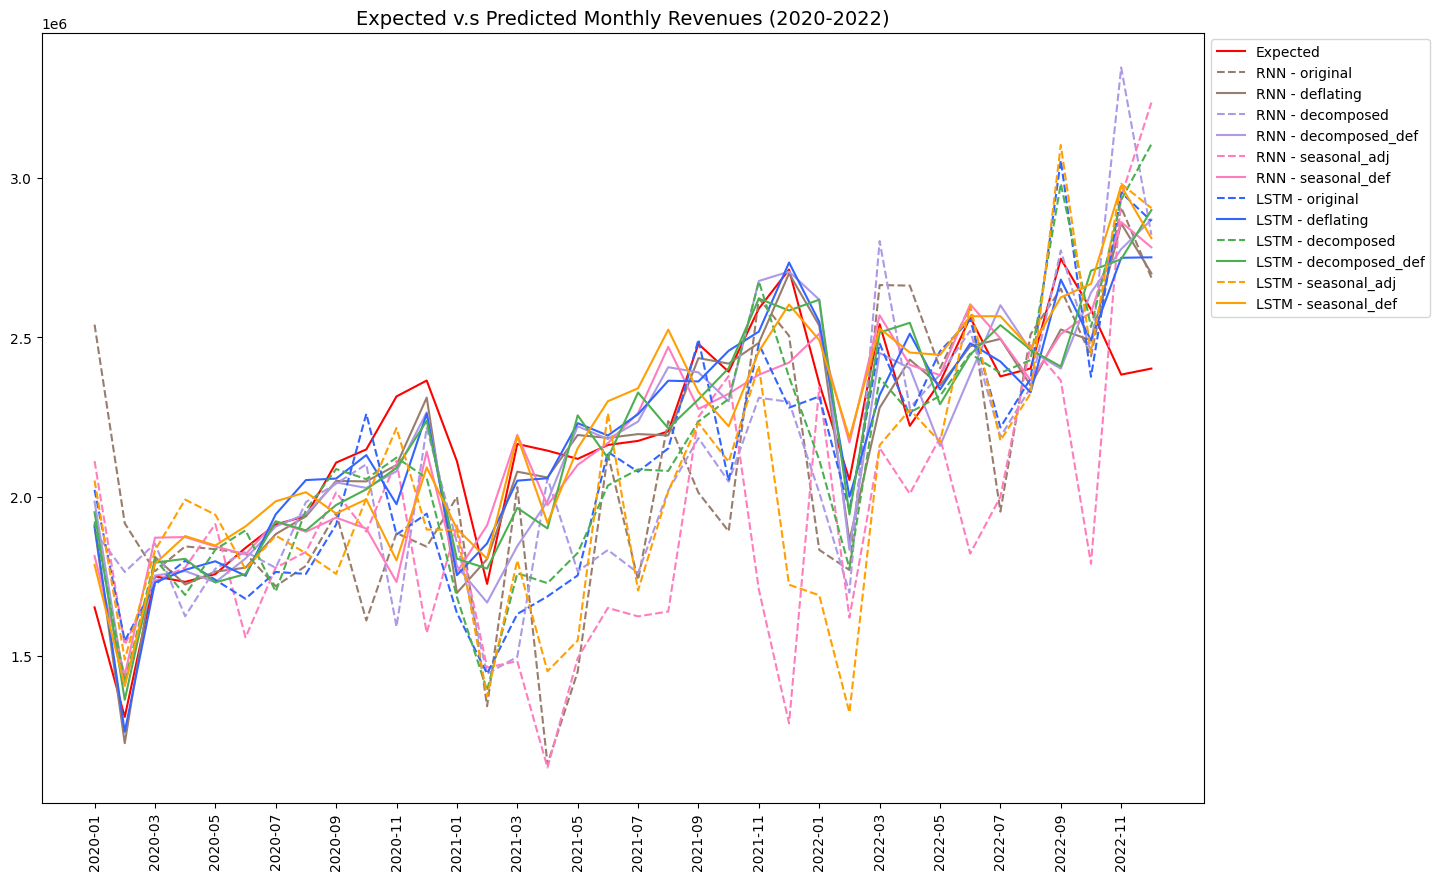

In [ ]:
plotExpectedPredictedRevenues(org_data, pred_rnn, pred_lstm, start_y, nn=True)

#### **8.1.2 分模型畫圖**

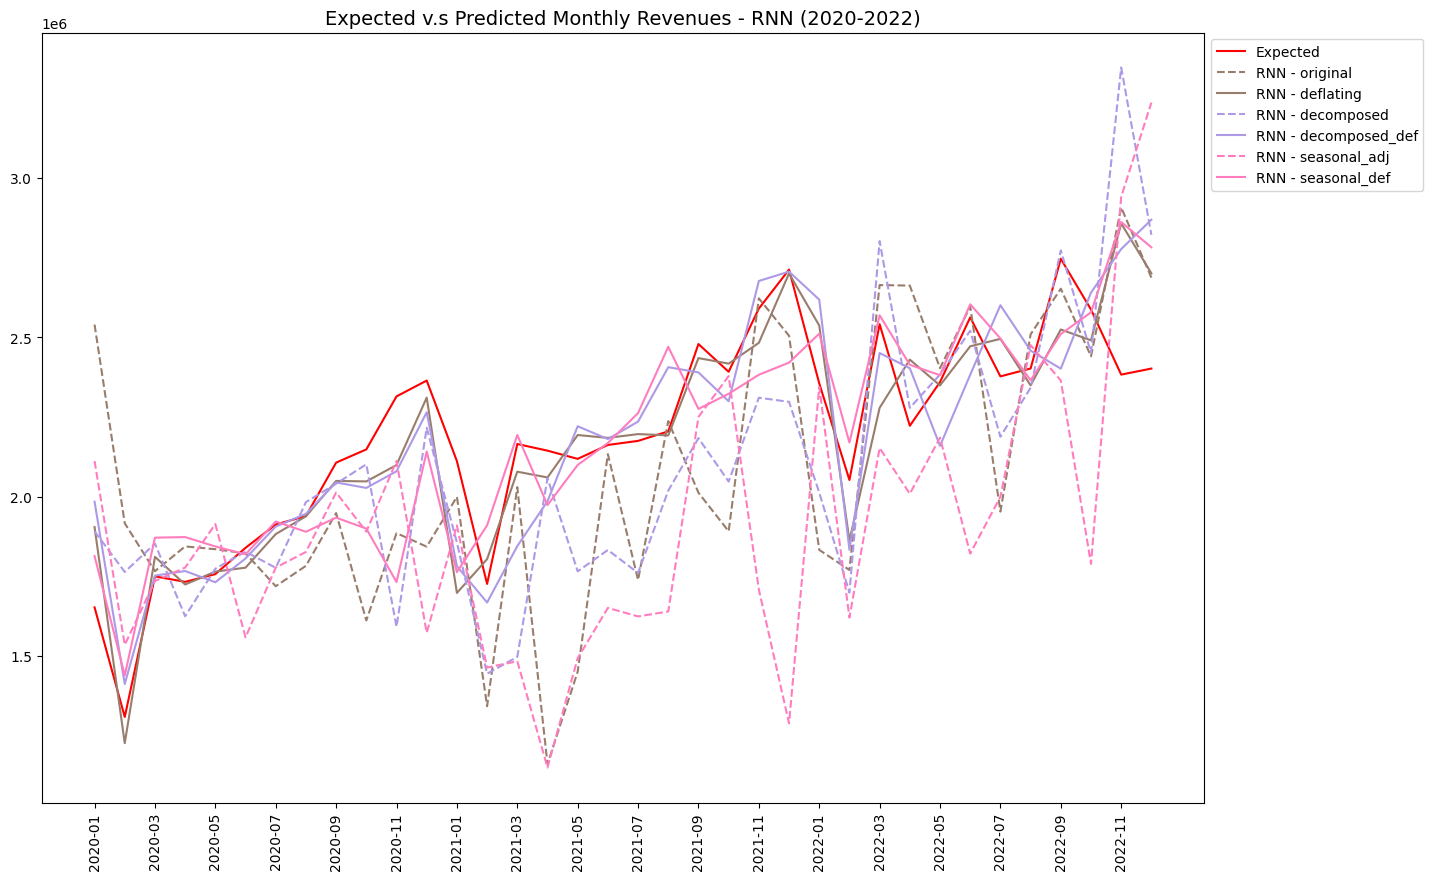

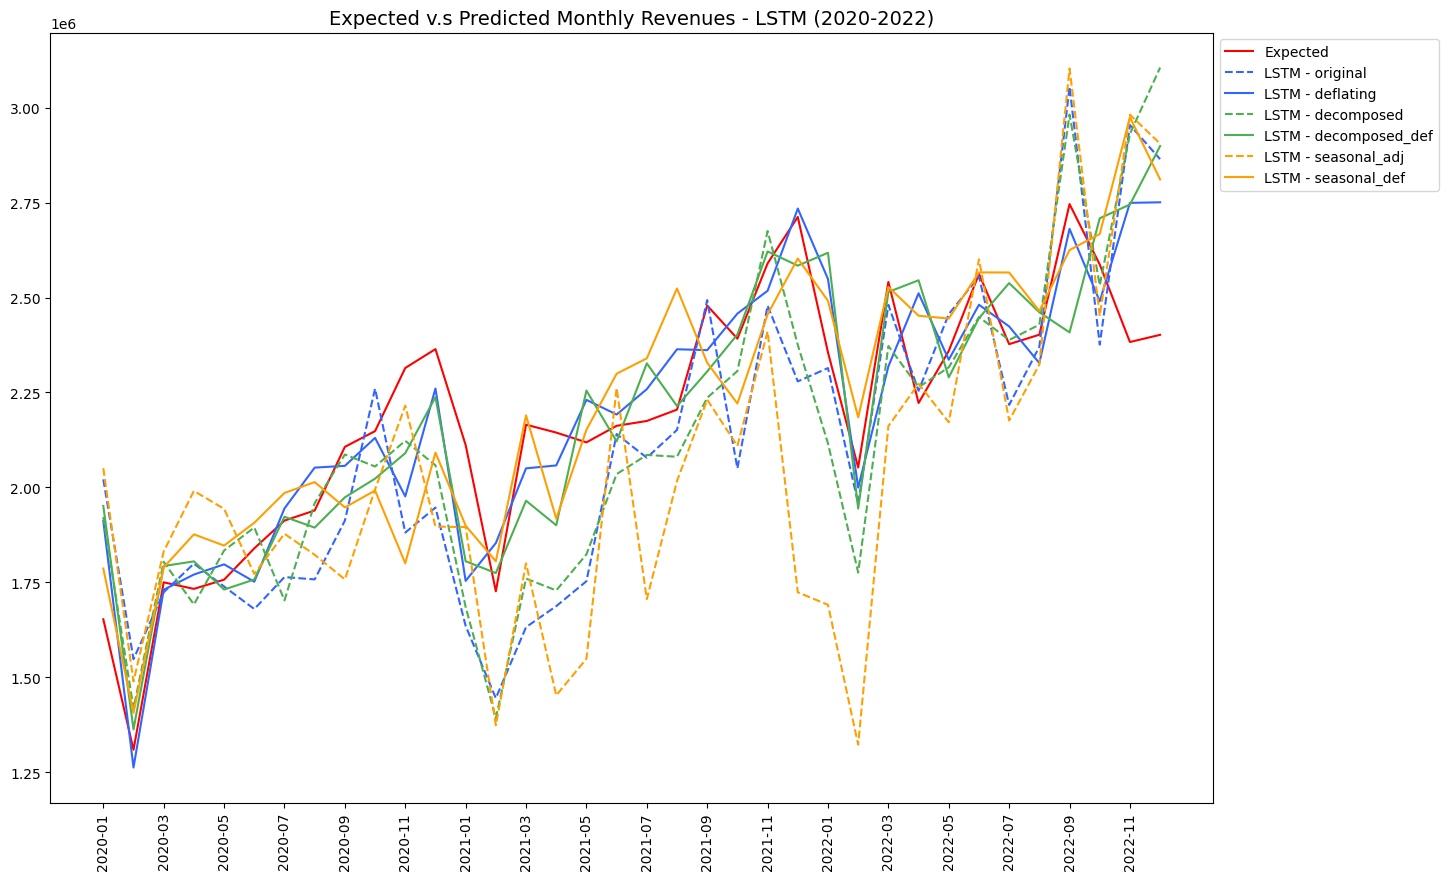

In [ ]:
plotModelExpectedPredictedRevenues(org_data, pred_rnn, 'rnn', start_y)
plotModelExpectedPredictedRevenues(org_data, pred_lstm, 'lstm', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.1 Plot All Scores**

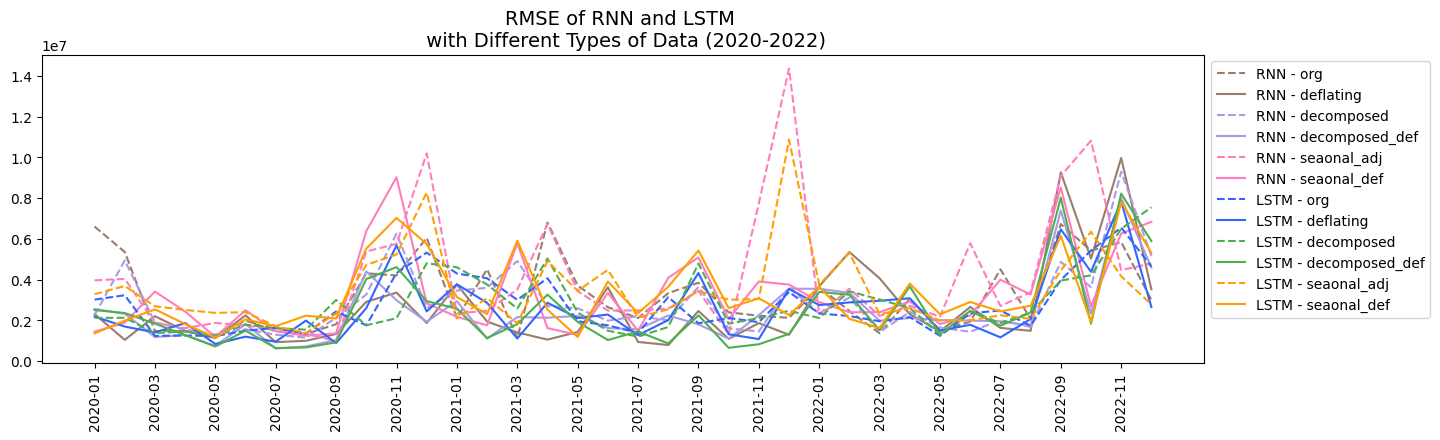

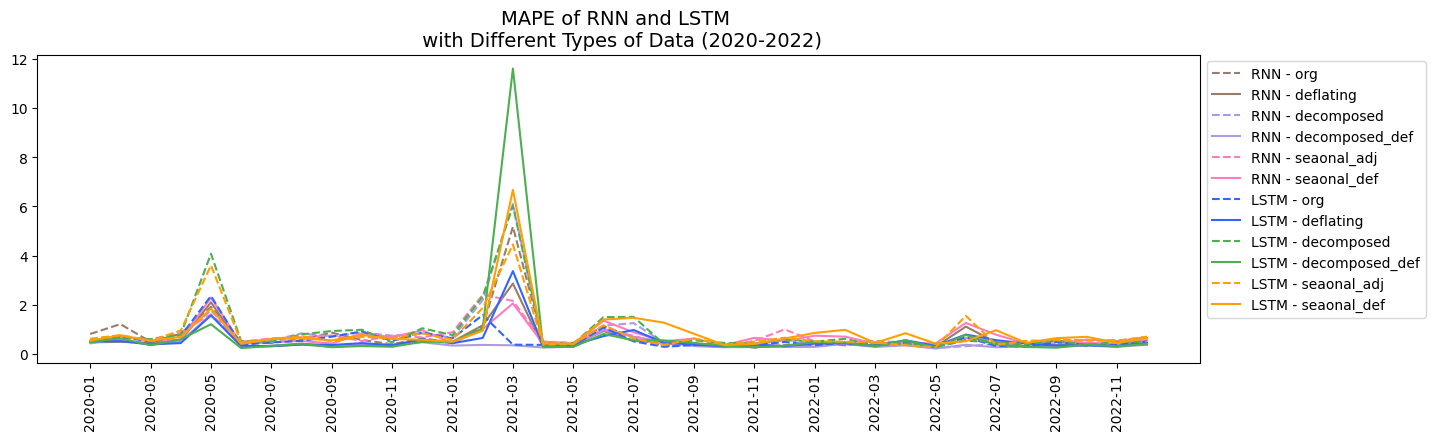

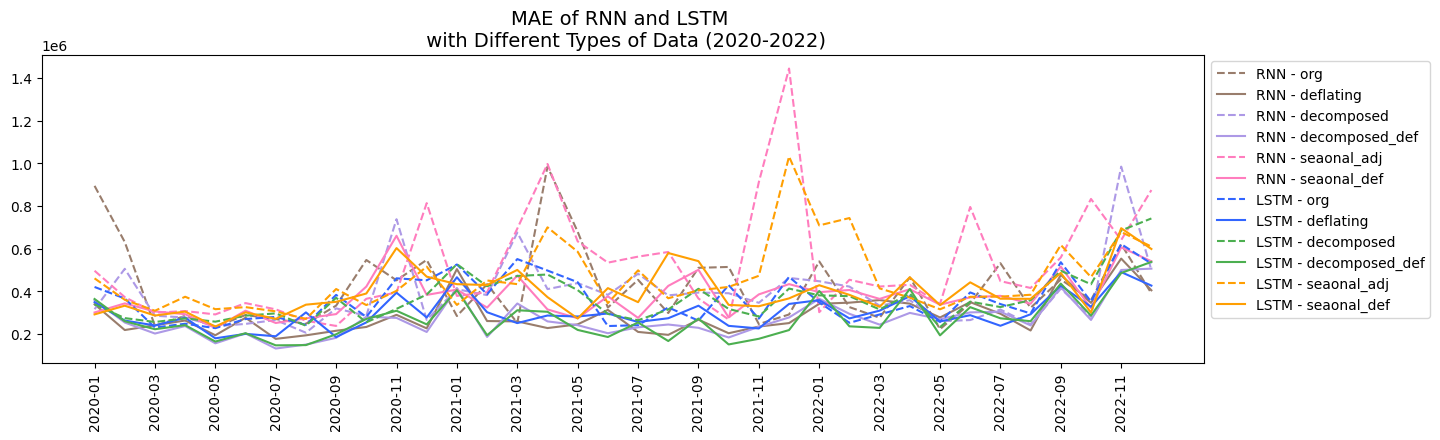

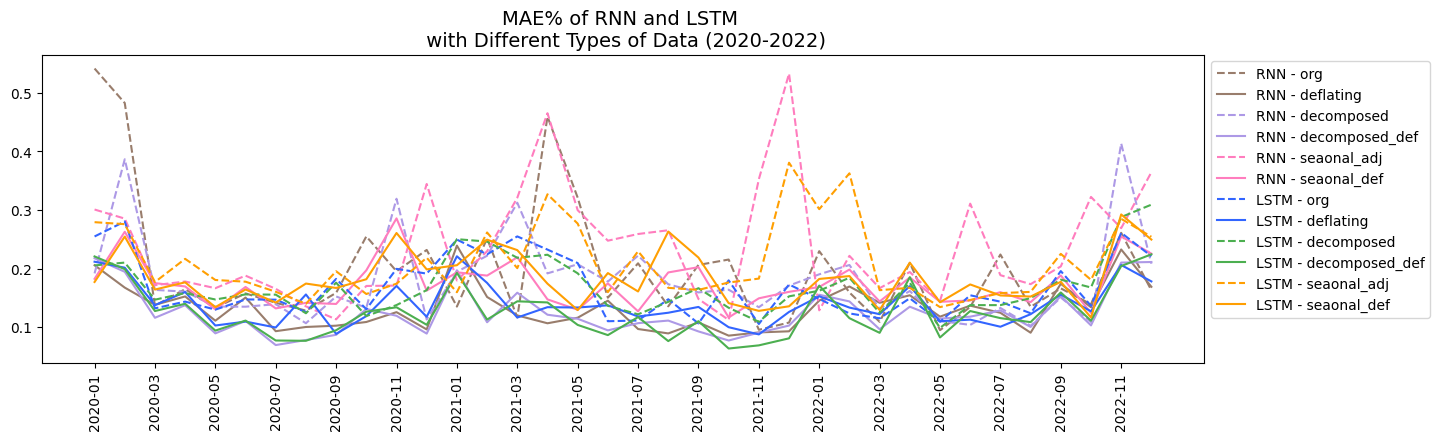

In [ ]:
plotAllScores(scores_rnn, scores_lstm, start_y, nn=True)

#### **8.2.2 分模型畫圖**

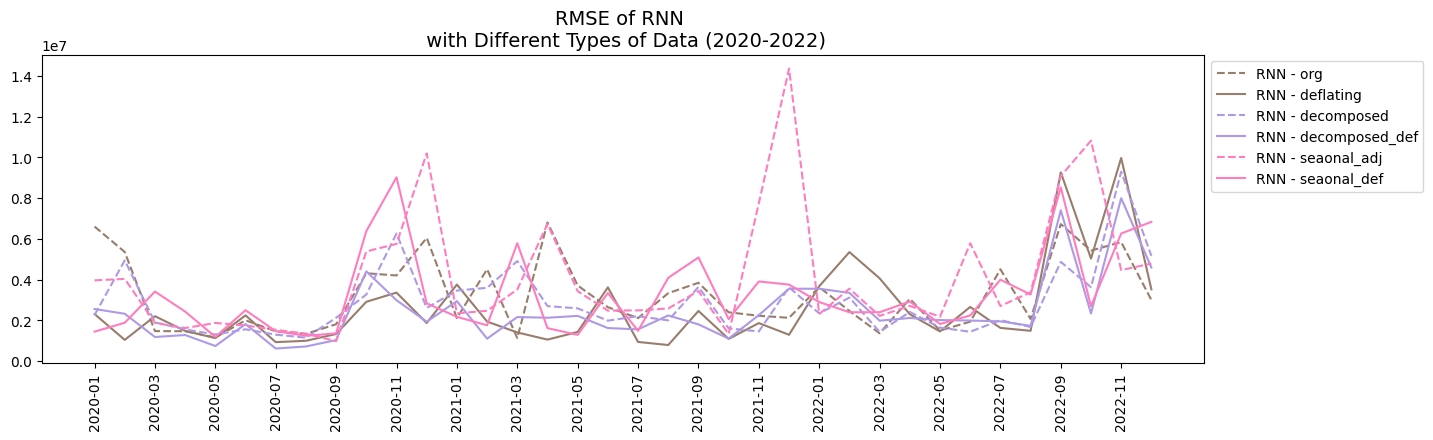

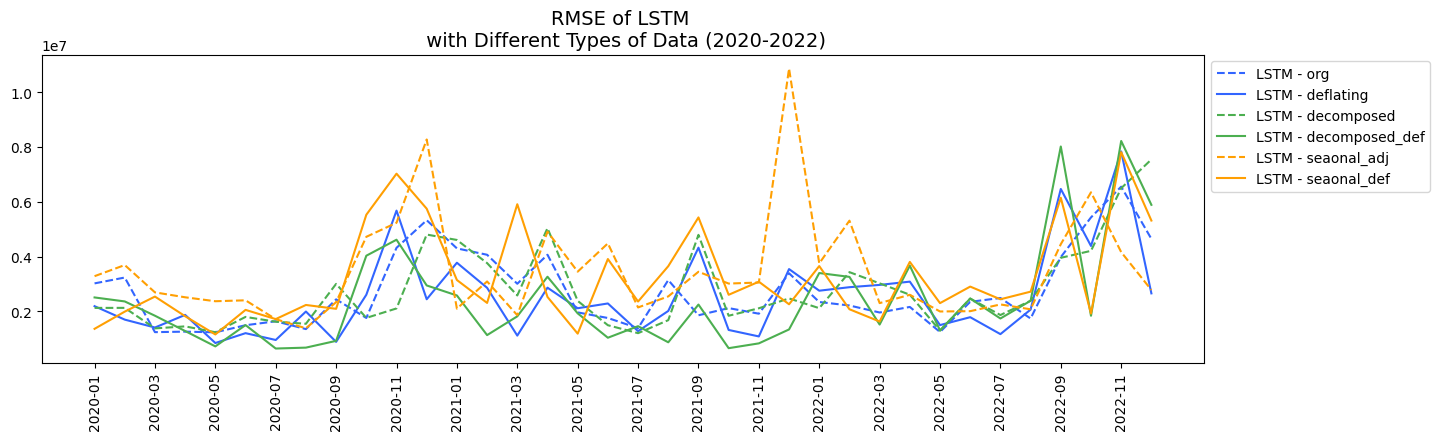

In [ ]:
# RMSE
compareModelScore(scores_rnn, scores_lstm, 'RMSE', start_y, nn=True)  

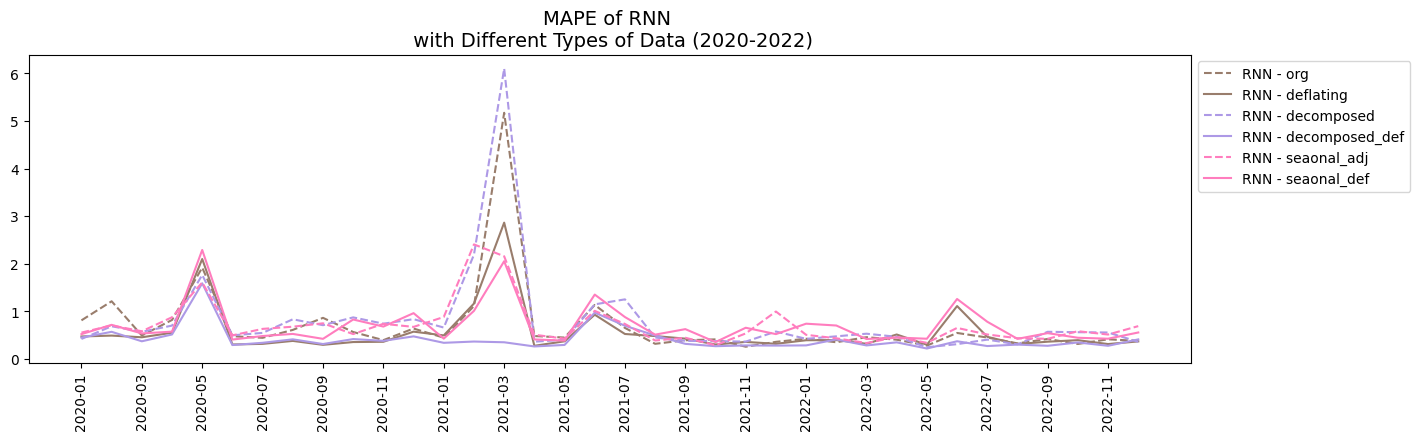

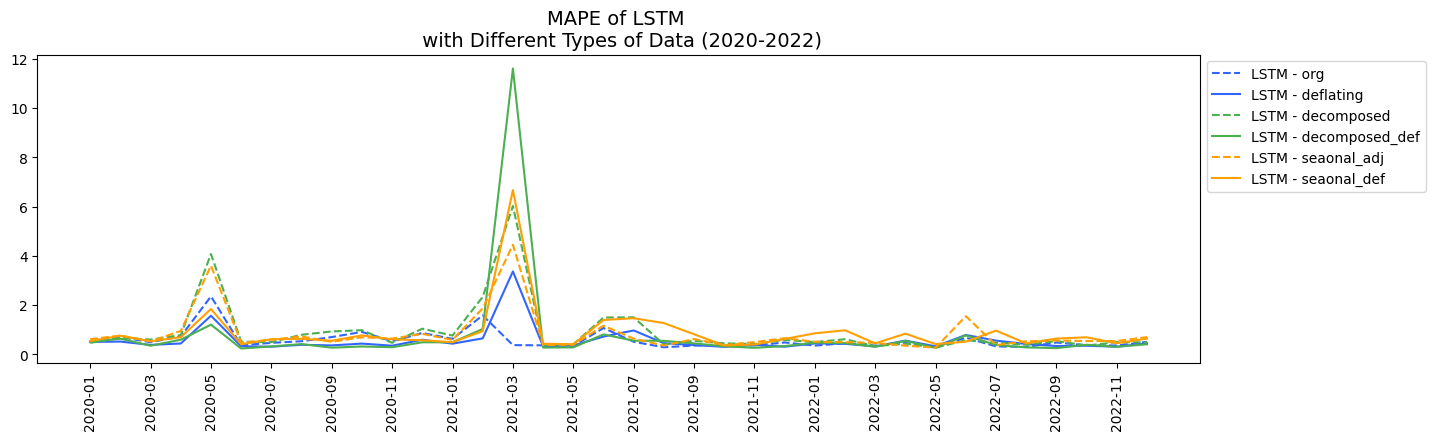

In [ ]:
# MAPE
compareModelScore(scores_rnn, scores_lstm, 'MAPE', start_y, nn=True)  

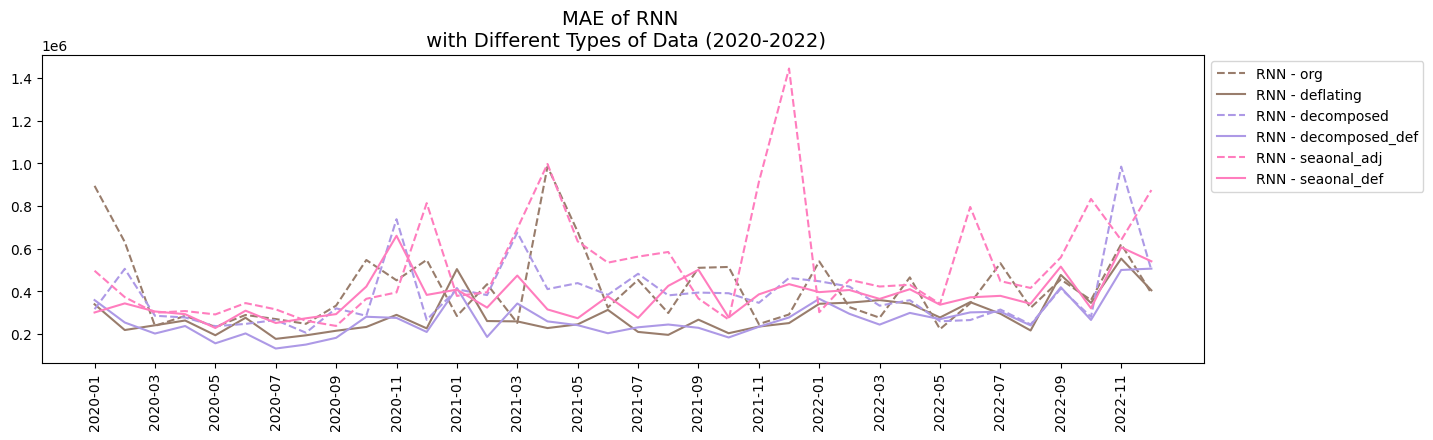

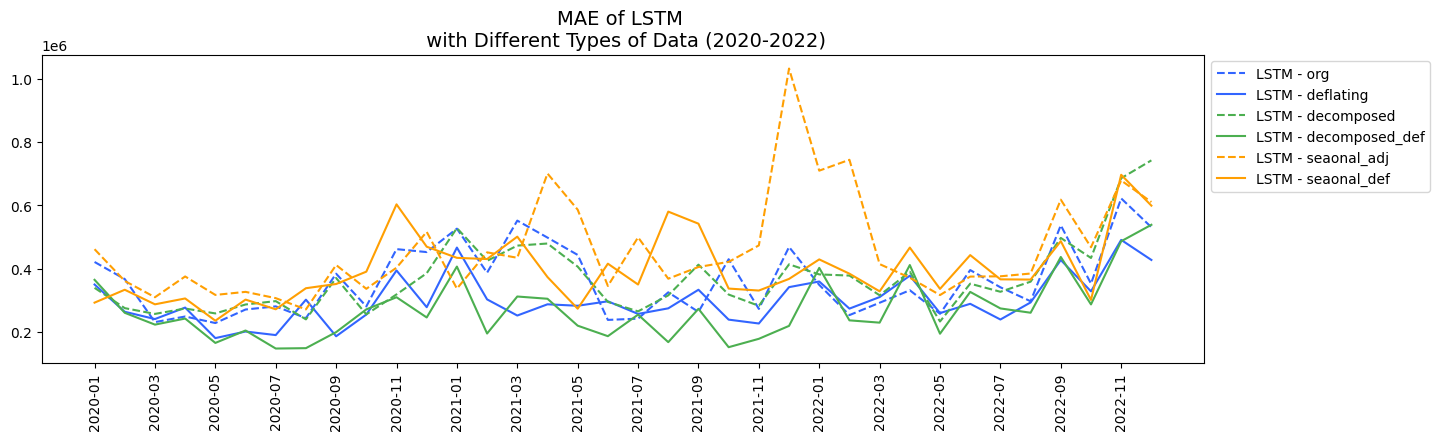

In [ ]:
# MAE
compareModelScore(scores_rnn, scores_lstm, 'MAE', start_y, nn=True)  

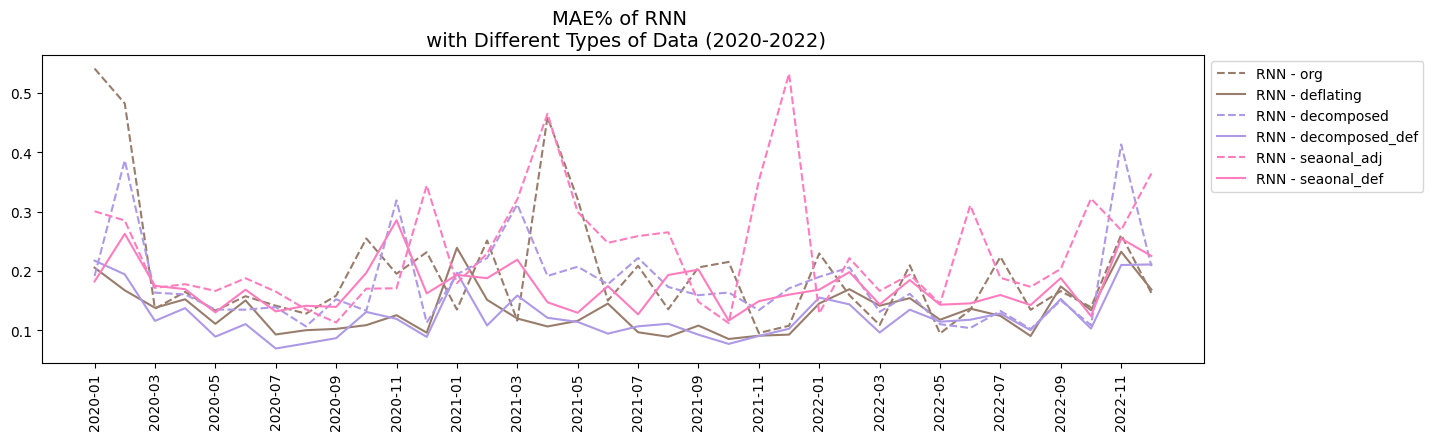

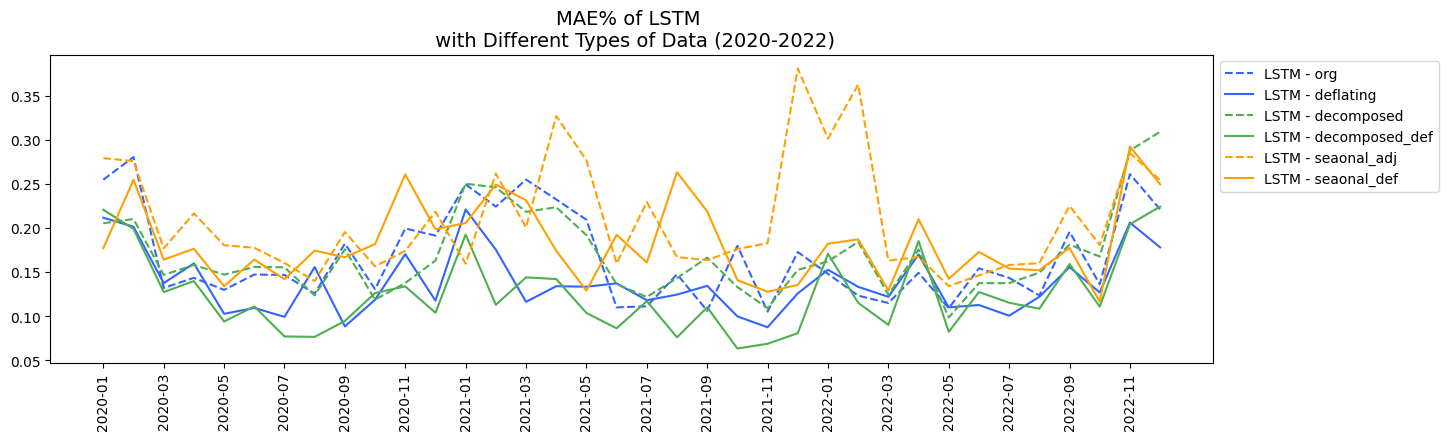

In [ ]:
# MAE%
compareModelScore(scores_rnn, scores_lstm, 'MAE%', start_y, nn=True)  

#### **8.2.3 Boxplot**

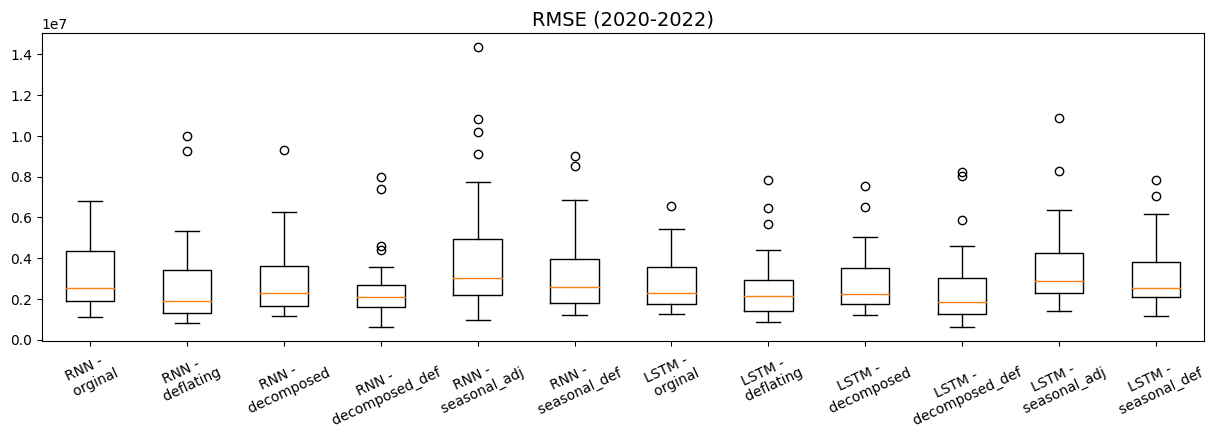

In [ ]:
# RMSE
scoreBoxplotV(scores_rnn, scores_lstm, 'RMSE', start_y, nn=True)  

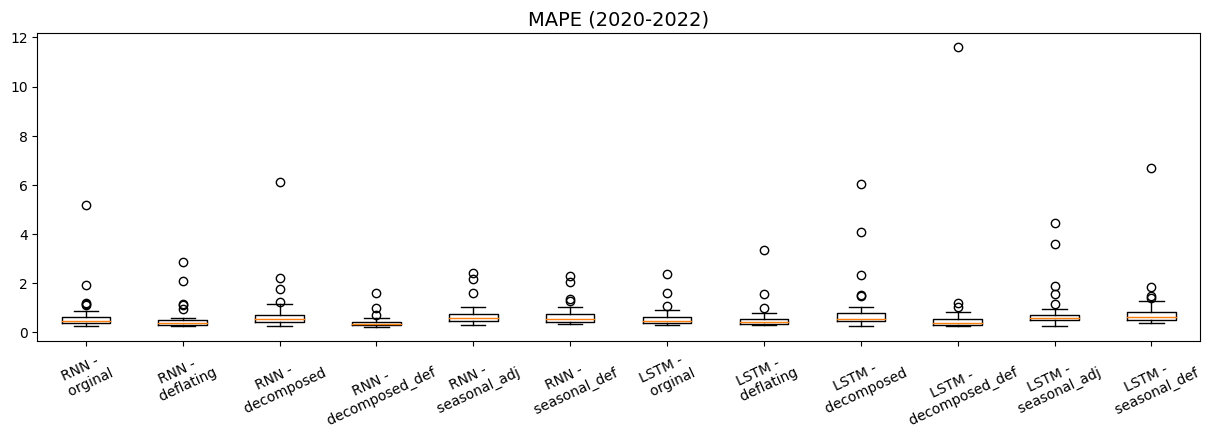

In [ ]:
# MAPE
scoreBoxplotV(scores_rnn, scores_lstm, 'MAPE', start_y, nn=True)  

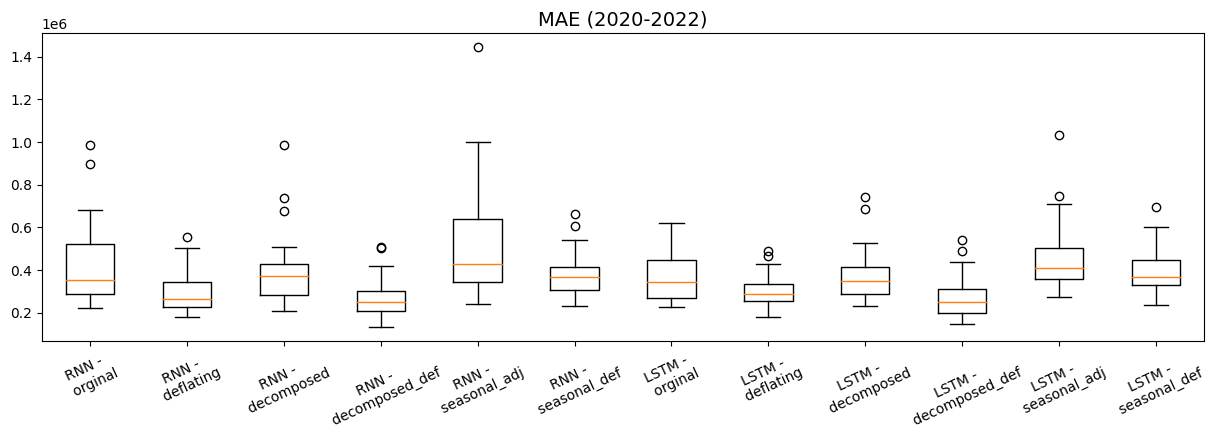

In [ ]:
# MAE
scoreBoxplotV(scores_rnn, scores_lstm, 'MAE', start_y, nn=True)  

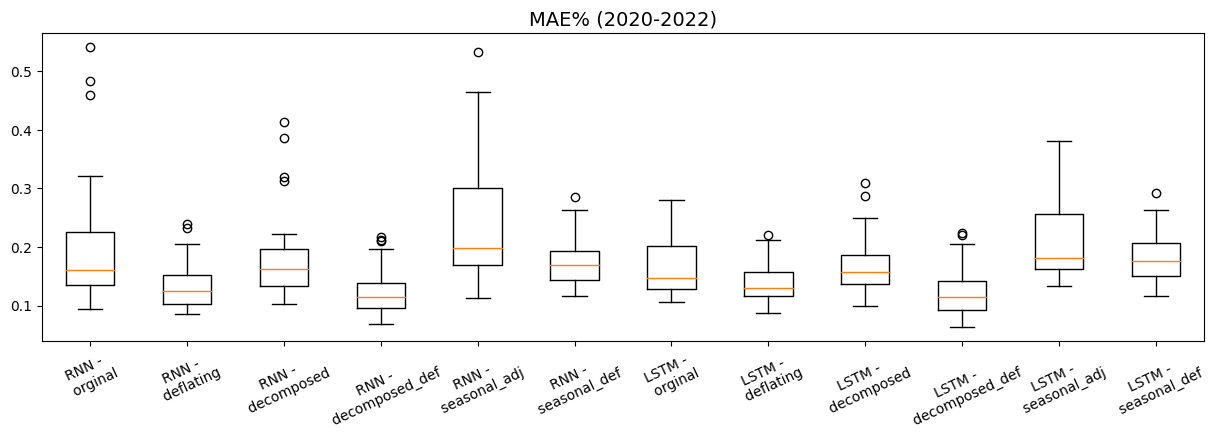

In [ ]:
# MAE%
scoreBoxplotV(scores_rnn, scores_lstm, 'MAE%', start_y, nn=True)  

## **9. Best and Worst Model**

In [ ]:
bw = BestWorstModelNN(scores_rnn, scores_lstm)

### **9.1 各模型組合中，預測最好和最差的月份**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|6|4|2 (fixed)|2x6x4x2 = 96|

#### **9.1.1 RMSE**

In [ ]:
best_rmse, worst_rmse = bw.findBestWorstForAll('RMSE')

##### **最佳月份**

In [ ]:
best_rmse

,modelName,dataType,scoreType,min_month,min_score
0,RNN,org,RMSE,2021-03,1133754.0
4,RNN,def,RMSE,2021-08,792975.0
8,RNN,dec,RMSE,2020-08,1154804.0
12,RNN,dec_def,RMSE,2020-07,621158.0
16,RNN,season,RMSE,2020-09,985642.0
20,RNN,season_def,RMSE,2020-05,1192792.0
0,LSTM,org,RMSE,2020-03,1082164.0
4,LSTM,def,RMSE,2021-08,900538.0
8,LSTM,dec,RMSE,2020-07,1189696.0
12,LSTM,dec_def,RMSE,2021-10,739064.0


##### **最差月份**

In [ ]:
worst_rmse

,modelName,dataType,scoreType,max_month,max_score
0,RNN,org,RMSE,2021-04,6805163.0
4,RNN,def,RMSE,2022-11,9970669.0
8,RNN,dec,RMSE,2022-11,9298969.0
12,RNN,dec_def,RMSE,2022-11,7998462.0
16,RNN,season,RMSE,2021-12,14360228.0
20,RNN,season_def,RMSE,2020-11,9023291.0
0,LSTM,org,RMSE,2021-04,13940648.0
4,LSTM,def,RMSE,2022-09,6699254.0
8,LSTM,dec,RMSE,2022-11,6713083.0
12,LSTM,dec_def,RMSE,2022-11,9989060.0


#### **9.1.2 MAPE**

In [ ]:
best_mape, worst_mape = bw.findBestWorstForAll('MAPE')

##### **最佳月份**

In [ ]:
best_mape

,modelName,dataType,scoreType,min_month,min_score
3,RNN,org,MAPE,2021-11,0.2569
7,RNN,def,MAPE,2021-04,0.2764
11,RNN,dec,MAPE,2022-05,0.2460
15,RNN,dec_def,MAPE,2022-05,0.2190
19,RNN,season,MAPE,2021-10,0.2886
23,RNN,season_def,MAPE,2021-10,0.3547
3,LSTM,org,MAPE,2021-11,0.2539
7,LSTM,def,MAPE,2020-09,0.3019
11,LSTM,dec,MAPE,2022-05,0.2817
15,LSTM,dec_def,MAPE,2020-06,0.2587


##### **最差月份**

In [ ]:
worst_mape

,modelName,dataType,scoreType,max_month,max_score
3,RNN,org,MAPE,2021-03,5.1721
7,RNN,def,MAPE,2021-03,2.8641
11,RNN,dec,MAPE,2021-03,6.1025
15,RNN,dec_def,MAPE,2020-05,1.5899
19,RNN,season,MAPE,2021-02,2.4070
23,RNN,season_def,MAPE,2020-05,2.2899
3,LSTM,org,MAPE,2020-05,3.0836
7,LSTM,def,MAPE,2021-03,17.9273
11,LSTM,dec,MAPE,2021-03,1.8786
15,LSTM,dec_def,MAPE,2021-03,11.3167


#### **9.1.3 MAE**

In [ ]:
best_mae, worst_mae = bw.findBestWorstForAll('MAE')

##### **最佳月份**

In [ ]:
best_mae

,modelName,dataType,scoreType,min_month,min_score
1,RNN,org,MAE,2022-05,223395.0
5,RNN,def,MAE,2020-07,177830.0
9,RNN,dec,MAE,2020-08,206659.0
13,RNN,dec_def,MAE,2020-07,132547.0
17,RNN,season,MAE,2020-09,238425.0
21,RNN,season_def,MAE,2020-05,228786.0
1,LSTM,org,MAE,2020-03,212647.0
5,LSTM,def,MAE,2020-05,217168.0
9,LSTM,dec,MAE,2022-05,222520.0
13,LSTM,dec_def,MAE,2020-08,157768.0


##### **最差月份**

In [ ]:
worst_mae

,modelName,dataType,scoreType,max_month,max_score
1,RNN,org,MAE,2021-04,984916.0
5,RNN,def,MAE,2022-11,554031.0
9,RNN,dec,MAE,2022-11,985048.0
13,RNN,dec_def,MAE,2022-12,507013.0
17,RNN,season,MAE,2021-12,1444778.0
21,RNN,season_def,MAE,2020-11,660949.0
1,LSTM,org,MAE,2021-04,813864.0
5,LSTM,def,MAE,2022-12,485169.0
9,LSTM,dec,MAE,2022-11,687483.0
13,LSTM,dec_def,MAE,2022-12,668911.0


#### **9.1.3 MAE%**

In [ ]:
best_mae_p, worst_mae_p = bw.findBestWorstForAll('MAE%')

##### **最佳月份**

In [ ]:
best_mae_p

,modelName,dataType,scoreType,min_month,min_score
2,RNN,org,MAE%,2022-05,0.0947
6,RNN,def,MAE%,2021-10,0.0854
10,RNN,dec,MAE%,2022-08,0.1022
14,RNN,dec_def,MAE%,2020-07,0.0693
18,RNN,season,MAE%,2021-10,0.1122
22,RNN,season_def,MAE%,2021-10,0.1164
2,LSTM,org,MAE%,2021-11,0.0937
6,LSTM,def,MAE%,2021-10,0.0964
10,LSTM,dec,MAE%,2022-05,0.0943
14,LSTM,dec_def,MAE%,2021-10,0.0675


##### **最差月份**

In [ ]:
worst_mae_p

,modelName,dataType,scoreType,max_month,max_score
2,RNN,org,MAE%,2020-01,0.5414
6,RNN,def,MAE%,2021-01,0.2391
10,RNN,dec,MAE%,2022-11,0.4134
14,RNN,dec_def,MAE%,2020-01,0.2175
18,RNN,season,MAE%,2021-12,0.5327
22,RNN,season_def,MAE%,2020-11,0.2856
2,LSTM,org,MAE%,2021-04,0.3795
6,LSTM,def,MAE%,2021-02,0.2389
10,LSTM,dec,MAE%,2022-11,0.2885
14,LSTM,dec_def,MAE%,2022-12,0.2785


### **9.2 RNN 和 LSTM 各自預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|1|4|2 (fixed)|2x1x4x2 = 16|

#### **9.2.1 RMSE**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['RMSE']

,modelName,dataType,scoreType,min_month,min_score
12,RNN,dec_def,RMSE,2020-07,621158.0


In [ ]:
# LSTM
bw.best_lstm['RMSE']

,modelName,dataType,scoreType,min_month,min_score
12,LSTM,dec_def,RMSE,2021-10,739064.0


##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['RMSE']

,modelName,dataType,scoreType,max_month,max_score
16,RNN,season,RMSE,2021-12,14360228.0


In [ ]:
# LSTM
bw.worst_lstm['RMSE']

,modelName,dataType,scoreType,max_month,max_score
0,LSTM,org,RMSE,2021-04,13940648.0


#### **9.2.2 MAPE**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['MAPE']

,modelName,dataType,scoreType,min_month,min_score
15,RNN,dec_def,MAPE,2022-05,0.219


In [ ]:
# LSTM
bw.best_lstm['MAPE']

,modelName,dataType,scoreType,min_month,min_score
3,LSTM,org,MAPE,2021-11,0.2539


##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['MAPE']

,modelName,dataType,scoreType,max_month,max_score
11,RNN,dec,MAPE,2021-03,6.1025


In [ ]:
# LSTM
bw.worst_lstm['MAPE']

,modelName,dataType,scoreType,max_month,max_score
23,LSTM,season_def,MAPE,2021-03,25.321


#### **9.2.3 MAE**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['MAE']

,modelName,dataType,scoreType,min_month,min_score
13,RNN,dec_def,MAE,2020-07,132547.0


In [ ]:
# LSTM
bw.best_lstm['MAE']

,modelName,dataType,scoreType,min_month,min_score
13,LSTM,dec_def,MAE,2020-08,157768.0


##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['MAE']

,modelName,dataType,scoreType,max_month,max_score
17,RNN,season,MAE,2021-12,1444778.0


In [ ]:
# LSTM
bw.worst_lstm['MAE']

,modelName,dataType,scoreType,max_month,max_score
17,LSTM,season,MAE,2022-11,875617.0


#### **9.2.4 MAE%**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['MAE%']

,modelName,dataType,scoreType,min_month,min_score
14,RNN,dec_def,MAE%,2020-07,0.0693


In [ ]:
# LSTM
bw.best_lstm['MAE%']

,modelName,dataType,scoreType,min_month,min_score
14,LSTM,dec_def,MAE%,2021-10,0.0675


##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['MAE%']

,modelName,dataType,scoreType,max_month,max_score
2,RNN,org,MAE%,2020-01,0.5414


In [ ]:
# LSTM
bw.worst_lstm['MAE%']

,modelName,dataType,scoreType,max_month,max_score
2,LSTM,org,MAE%,2021-04,0.3795


### **9.3 所有模型組合中，預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|


#### **9.3.1 RMSE**

##### **最佳模型**

In [ ]:
bw.best_all['RMSE']

,modelName,dataType,scoreType,min_month,min_score
12,RNN,dec_def,RMSE,2020-07,621158.0


##### **最差模型**

In [ ]:
bw.worst_all['RMSE']

,modelName,dataType,scoreType,max_month,max_score
16,RNN,season,RMSE,2021-12,14360228.0


#### **9.3.2 MAPE**

##### **最佳模型**

In [ ]:
bw.best_all['MAPE']

,modelName,dataType,scoreType,min_month,min_score
15,RNN,dec_def,MAPE,2022-05,0.219


##### **最差模型**

In [ ]:
bw.worst_all['MAPE']

,modelName,dataType,scoreType,max_month,max_score
23,LSTM,season_def,MAPE,2021-03,25.321


#### **9.3.3 MAE**

##### **最佳模型**

In [ ]:
bw.best_all['MAE']

,modelName,dataType,scoreType,min_month,min_score
13,RNN,dec_def,MAE,2020-07,132547.0


##### **最差模型**

In [ ]:
bw.worst_all['MAE']

,modelName,dataType,scoreType,max_month,max_score
17,RNN,season,MAE,2021-12,1444778.0


#### **9.3.4 MAE%**

##### **最佳模型**

In [ ]:
bw.best_all['MAE%']

,modelName,dataType,scoreType,min_month,min_score
14,LSTM,dec_def,MAE%,2021-10,0.0675


##### **最差模型**

In [ ]:
bw.worst_all['MAE%']

,modelName,dataType,scoreType,max_month,max_score
2,RNN,org,MAE%,2020-01,0.5414
